In [5]:
#Three cells are taken directly from TACO,but the rest of them are done by myself.
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from IPython.display import display
import operator

anns_file_path = 'data/annotations.json'

# Read annotations
with open(anns_file_path, 'r') as f:
    dataset = json.loads(f.read())

categories = dataset['categories']
anns = dataset['annotations']
imgs = dataset['images']
nr_cats = len(categories)
nr_annotations = len(anns)
nr_images = len(imgs)

# Load categories and super categories
cat_names = []
super_cat_names = []
super_cat_ids = {}
super_cat_last_name = ''
nr_super_cats = 0
for cat_it in categories:
    cat_names.append(cat_it['name'])
    super_cat_name = cat_it['supercategory']
    # Adding new supercat
    if super_cat_name != super_cat_last_name:
        super_cat_names.append(super_cat_name)
        super_cat_ids[super_cat_name] = nr_super_cats
        super_cat_last_name = super_cat_name
        nr_super_cats += 1

print('Number of super categories:', nr_super_cats)
print('Number of categories:', nr_cats)
print('Number of annotations:', nr_annotations)
print('Number of images:', nr_images)

Number of super categories: 28
Number of categories: 60
Number of annotations: 4784
Number of images: 1500


C:\Users\shory\AppData\Local\Temp\ipykernel_19368\727567836.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_values except for the argument 'by' will be keyword-only.
  df = df.sort_values('Number of annotations', 0, False)


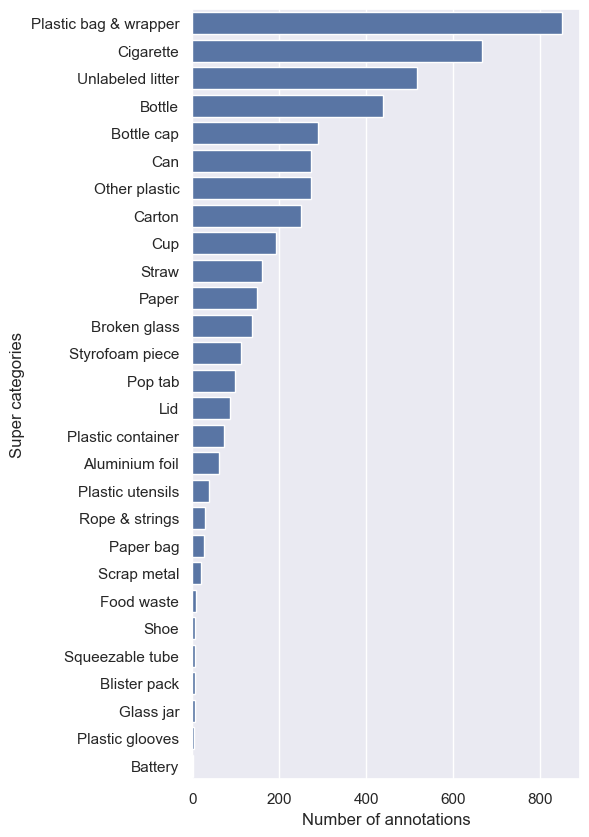

In [6]:
cat_ids_2_supercat_ids = {}
for cat in categories:
    cat_ids_2_supercat_ids[cat['id']] = super_cat_ids[cat['supercategory']]

# Count annotations
super_cat_histogram = np.zeros(nr_super_cats,dtype=int)
for ann in anns:
    cat_id = ann['category_id']
    super_cat_histogram[cat_ids_2_supercat_ids[cat_id]] +=1
    
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5,10))
    
# Convert to DataFrame
d ={'Super categories': super_cat_names, 'Number of annotations': super_cat_histogram}
df = pd.DataFrame(d)
df = df.sort_values('Number of annotations', 0, False)

# sns.set_color_codes("pastel")
# sns.set(style="whitegrid")
plot_1 = sns.barplot(x="Number of annotations", y="Super categories", data=df,
            label="Total", color="b")
#plot_1.set_title('Annotations per super category',fontsize=20) 



In [7]:
#displaying supercategory count 
super_cat_dict={}

#converting names and frequency to dict
for i,j in zip(super_cat_names,super_cat_histogram):
    super_cat_dict[i]=j

#sortinf the dict in reverse by value
sort_by_value = operator.itemgetter(1)
super_cat_dict = sorted(super_cat_dict.items(), key=sort_by_value, reverse=True)

#converting to pandas dataframe
df = pd.DataFrame(super_cat_dict,index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28])
df.columns=['Super-Category','Frequency']

#displaying the dataframe
display(df)

#I might omit the low frequency data

,Super-Category,Frequency
1,Plastic bag & wrapper,850
2,Cigarette,667
3,Unlabeled litter,517
4,Bottle,439
5,Bottle cap,289
6,Can,273
7,Other plastic,273
8,Carton,251
9,Cup,192
10,Straw,161


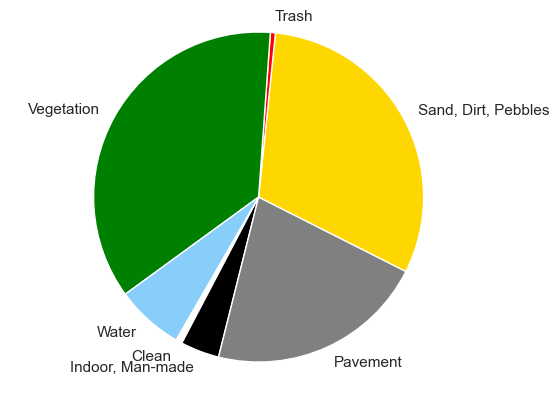

In [8]:
# Get scene cat names
scene_cats = dataset['scene_categories']
scene_name = []
for scene_cat in scene_cats:
    scene_name.append(scene_cat['name'])

nr_scenes = len(scene_cats)
scene_cat_histogram = np.zeros(nr_scenes,dtype=int)

for scene_ann in dataset['scene_annotations']:    
    scene_ann_ids = scene_ann['background_ids']
    for scene_ann_id in scene_ann_ids:
        if scene_ann_id<len(scene_cats):
            scene_cat_histogram[scene_ann_id]+=1

# Convert to DataFrame
df = pd.DataFrame({'scene_cats': scene_cats, 'nr_annotations': scene_cat_histogram})
 
# Plot
colors = ['white','black','gray', 'gold', 'red','green','lightskyblue']
plt.pie(scene_cat_histogram, labels=scene_name, colors = colors,
      shadow=False, startangle=-120)
 
plt.axis('equal')
plt.show()

In [9]:
#bbox values
bbox={}

#storing the bbox values with their ids
for i in anns:
    bbox[i['image_id']]=i['bbox']
    
#checking the values for inaccuracies and displaying them
for key, value in bbox.items():
    if (value[0]<0 or value[0]>imgs[key]['width']) or (value[2]<0 or value[2]>imgs[key]['width'])or (value[1]<0 or value[1]>imgs[key]['height']) or (value[3]<0 or value[3]>imgs[key]['height']):
        print(key , value)
        
# 3 values are negative we have to watch out for this in our data

109 [1003.0, -1.0, 787.0, 411.0]
278 [-1.0, 366.0, 198.0, 307.0]
679 [1311.0, -0.5, 286.0, 589.0]


In [10]:
#segmentation values
seg={}

#storing the segmentations values with their ids
for i in anns:
    bbox[i['image_id']]=i['segmentation']
    
#checking the values for inaccuracies and displaying them
for key, value in seg.items():
    for j in range(0,len(value),2):
        if (value[j]<0 or value[j]>imgs[key]['width']) or (value[j+1]<0 or value[j+1]>imgs[key]['height']):
            print(key , value)

#segmentation values are right

In [11]:
#crowded images count
crowded_no={}

#intializing the dict
for j in super_cat_names:
    crowded_no[j]=0
    
#coutning the values for each category
for i in anns:
    if(i['iscrowd']==1):
        crowded_no[categories[i['category_id']]]+=1
        
#converting to pandas dataframe
df = pd.DataFrame(crowded_no,index=[1])

#displaying the dataframe
display(df)

#There are no crowded images

,Aluminium foil,Battery,Blister pack,Bottle,Bottle cap,Broken glass,Can,Carton,Cup,Food waste,...,Plastic utensils,Pop tab,Rope & strings,Scrap metal,Shoe,Squeezable tube,Straw,Styrofoam piece,Unlabeled litter,Cigarette
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
#batch_wise analysis
batch_dict={'batch_1':[],'batch_2':[],'batch_3':[],'batch_4':[],'batch_5':[],'batch_6':[],'batch_7':[],'batch_8':[],'batch_9':[],'batch_10':[],'batch_11':[],'batch_12':[],'batch_13':[],'batch_14':[],'batch_15':[]}
ids_dict=[]
batches_total={'batch_1':{},'batch_2':{},'batch_3':{},'batch_4':{},'batch_5':{},'batch_6':{},'batch_7':{},'batch_8':{},'batch_9':{},'batch_10':{},'batch_11':{},'batch_12':{},'batch_13':{},'batch_14':{},'batch_15':{}}

#storing the ids for each batch
for i in imgs:
    r=i['file_name']
    batch_dict['batch_'+str(r)[str(r).find('_') + 1:str(r).find('/')]].append(i['id'])
               
#intializing the ids
for i in imgs:
    c={}
    for j in super_cat_names:
        c[j]=0
    ids_dict.append(c)

#using the id to get categories
for i in anns:
    ids_dict[i['image_id']][categories[i['category_id']]['supercategory']]+=1
    
#intializing the batch counts
for key,value in batches_total.items():
    for j in super_cat_names:
        value[j]=0
    
#replacing the ids in batch with categories from id
for key,value in batch_dict.items():
    for j in value:
        for c in super_cat_names:
            batches_total[key][c]+=ids_dict[j][c]
               
#converting to pandas dataframe
df=pd.DataFrame(batches_total)

#displaying the df
display(df)
        
#going to use this data to assign training,validation and test data

,batch_1,batch_2,batch_3,batch_4,batch_5,batch_6,batch_7,batch_8,batch_9,batch_10,batch_11,batch_12,batch_13,batch_14,batch_15
Aluminium foil,6,2,3,2,4,29,3,2,4,3,1,1,1,1,0
Battery,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Blister pack,1,0,2,0,0,0,0,0,0,1,0,3,0,0,0
Bottle,34,23,21,2,21,76,44,58,32,31,13,24,17,20,23
Bottle cap,26,14,12,14,11,23,29,32,19,9,11,25,26,21,17
Broken glass,2,0,0,0,0,0,1,81,0,4,0,0,0,27,23
Can,65,27,18,1,23,26,10,34,4,5,2,13,24,10,11
Carton,31,15,18,2,16,18,28,15,15,15,40,11,16,8,3
Cup,10,11,10,7,26,9,26,12,4,8,5,27,12,7,18
Food waste,5,1,1,1,0,0,0,0,0,0,0,0,0,0,0


In [69]:
#a way to convert coco to voc dataset
from pybboxes import BoundingBox

my_coco_box = [517.0, 127.0, 447.0, 1322.0]
coco_bbox = BoundingBox.from_coco(*my_coco_box)  
voc_bbox = coco_bbox.to_voc()  
voc_bbox_values = coco_bbox.to_voc(return_values=True)  
print(voc_bbox)

#from the data it looks like i need to add the the width and height to the first 2 coordinates respectively to get the required data

<[517 127 964 1449] (447x1322) | Image: (?x?)>


[BoundingBox(x1=186.1288, y1=246.1298, x2=308.3409, y2=412.9234, label=handphone)]


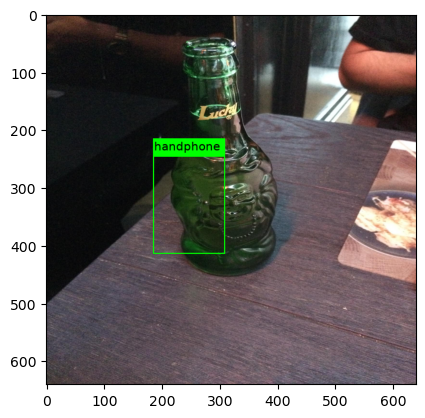

In [2]:
#a way to resize both bbox and image for resnet
# pip install -U chitra

from chitra.image import Chitra
import matplotlib.pyplot as plt

url="data/000006.jpg"
box = [[740.5,788,447,1322]]
label = ['handphone']
image = Chitra(url, box, label)
image.resize_image_with_bbox((640,640))
print(image.bboxes)
plt.imshow(image.draw_boxes())

#scaling the data should work 